# Analyse des résultats de VGG-16 pour certaines classes avec des images test propres au dataset d'entraînement et des images externes

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from datasets import dataset_utils
from nets import vgg
from preprocessing import vgg_preprocessing
import tf_slim as slim
from scipy.stats import norm

In [3]:
data_folder = "./imagenet/validation"
files = os.listdir(data_folder)

In [4]:
# Récupération des labels correspondants

labels_file = "./imagenet/val.txt"
with open(labels_file, 'r') as file:
    lines = file.readlines()
    
labels = []

for line in lines:
    spline = line.split(' ')
    label = int(spline[1])
    labels.append(label)

In [5]:
def get_refs_for_label(label_index): # Fonction permettant d'obtenir toutes les images pour un label donné
    return [files[i] for i, j in enumerate(labels) if j == label_index]

def move_refs_for_label(label_index): # Fonction permettant de déplacer toutes les images d'un label donné vers un dossier respectif
    if not os.path.exists("./imagenet/"+str(label_index)):
        os.mkdir("./imagenet/"+str(label_index))
    refs_list = get_refs_for_label(label_index)
    for file in refs_list :
        shutil.copy("./imagenet/validation/"+file, "./imagenet/"+str(label_index)+"/"+file)

In [6]:
# Réparition et copie de l'ensemble des images dans les répertoires respectifs

#for c in range(1000):
#    move_refs_for_label(c)

In [ ]:
url = "http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz"
checkpoints_dir = '/tmp/checkpoints'

if not tf.io.gfile.exists(checkpoints_dir):
    tf.io.gfile.makedirs(checkpoints_dir)

dataset_utils.download_and_uncompress_tarball(url, checkpoints_dir)

image_size = vgg.vgg_16.default_image_size

In [8]:
def get_pred_values_from_label_images_list(label_index):
    prob_list = []
    folder = "./imagenet/"+str(label_index)
    files_list = os.listdir(folder)
    for image_file in files_list:
        with tf.Graph().as_default():        
            image_flux = tf.io.read_file(folder+"/"+image_file)
            image = tf.image.decode_jpeg(image_flux, channels=3)
            processed_image = vgg_preprocessing.preprocess_image(image, image_size, image_size, is_training=False)
            processed_images  = tf.expand_dims(processed_image, 0)
            
            with slim.arg_scope(vgg.vgg_arg_scope()):
                # 1000 classes instead of 1001.
                logits, _ = vgg.vgg_16(processed_images, num_classes=1000, is_training=False)
            probabilities = tf.nn.softmax(logits)
            
            init_fn = slim.assign_from_checkpoint_fn(
                os.path.join(checkpoints_dir, 'vgg_16.ckpt'),
                slim.get_model_variables('vgg_16'))
    
            with tf.compat.v1.Session() as sess:
                init_fn(sess)
                np_image, probabilities = sess.run([image, probabilities])
                probabilities = probabilities[0, 0:]
                sorted_inds = [i[0] for i in sorted(enumerate(-probabilities), key=lambda x:x[1])]
            
            prob_list.append(probabilities[label_index]*100)
    return prob_list

In [9]:
def get_pred_values_from_new_images(folder_path, label_index):
    prob_list = []
    folder = folder_path
    files_list = os.listdir(folder)
    for image_file in files_list:
        with tf.Graph().as_default():        
            image_flux = tf.io.read_file(folder+"/"+image_file)
            image = tf.image.decode_jpeg(image_flux, channels=3)
            processed_image = vgg_preprocessing.preprocess_image(image, image_size, image_size, is_training=False)
            processed_images  = tf.expand_dims(processed_image, 0)
            
            with slim.arg_scope(vgg.vgg_arg_scope()):
                # 1000 classes instead of 1001.
                logits, _ = vgg.vgg_16(processed_images, num_classes=1000, is_training=False)
            probabilities = tf.nn.softmax(logits)
            
            init_fn = slim.assign_from_checkpoint_fn(
                os.path.join(checkpoints_dir, 'vgg_16.ckpt'),
                slim.get_model_variables('vgg_16'))
    
            with tf.compat.v1.Session() as sess:
                init_fn(sess)
                np_image, probabilities = sess.run([image, probabilities])
                probabilities = probabilities[0, 0:]
                sorted_inds = [i[0] for i in sorted(enumerate(-probabilities), key=lambda x:x[1])]
            
            prob_list.append(probabilities[label_index]*100)
    return prob_list

In [10]:
def make_int_pred_plot(data, nb_bins):
    plt.hist(data, nb_bins, density=False, alpha=0.6, color='b')
    mu, std = norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.ylim(0, 50)
    
    plt.xlabel("Probabilité de prédiction d'appartenance à la classe")
    plt.ylabel("Nombre d'images")
    plt.title('Histogramme des prédictions pour les images internes', fontweight = "bold")
    plt.show()
    
def make_ext_pred_plot(data, nb_bins):
    plt.hist(data, nb_bins, density=False, alpha=0.6, color='b')
    mu, std = norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.ylim(0, 50)
    
    plt.xlabel("Probabilité de prédiction d'appartenance à la classe")
    plt.ylabel("Nombre d'images")
    plt.title('Histogramme des prédictions pour les images externes', fontweight = "bold")
    plt.show()

In [143]:
prob_int_903 = get_pred_values_from_label_images_list(903)

INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:t

In [144]:
prob_ext_903 = get_pred_values_from_new_images("./built_dataset/wig", 903)

INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /tmp/checkpoints\vgg_16.ckpt
INFO:t

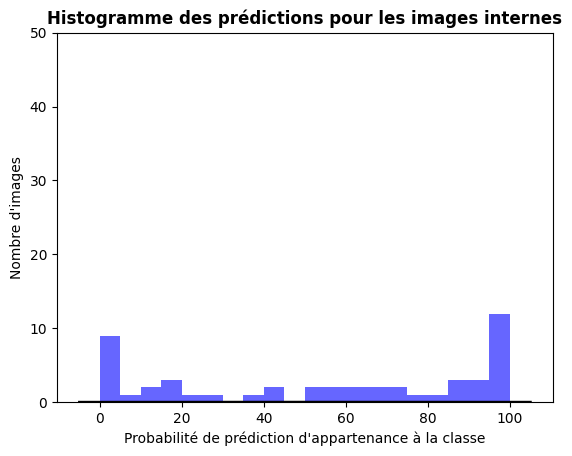

[0.10511028813198209,
 96.02545499801636,
 55.1238477230072,
 92.96168684959412,
 65.45696258544922,
 99.55333471298218,
 42.86700487136841,
 92.31518507003784,
 99.95125532150269,
 29.621276259422302,
 19.333283603191376,
 76.17073059082031,
 87.50708103179932,
 73.10073971748352,
 44.75557506084442,
 70.48631310462952,
 96.0378646850586,
 19.63072568178177,
 14.973938465118408,
 83.23095440864563,
 5.399984493851662,
 5.041337758302689,
 10.7284314930439,
 61.14475727081299,
 0.6410181056708097,
 19.398133456707,
 61.636412143707275,
 99.81719255447388,
 98.51175546646118,
 89.33075666427612,
 85.82959771156311,
 38.88224959373474,
 99.22860860824585,
 68.39508414268494,
 2.3348692804574966,
 0.19088113913312554,
 97.32108116149902,
 24.98931735754013,
 53.603219985961914,
 99.24167394638062,
 0.5300946533679962,
 59.56326127052307,
 55.01413941383362,
 0.9330300614237785,
 0.7456058636307716,
 1.4456270262598991,
 99.97488856315613,
 93.12008023262024,
 96.36197686195374,
 99.786901

In [147]:
make_int_pred_plot(prob_int_903, 20)
prob_int_903

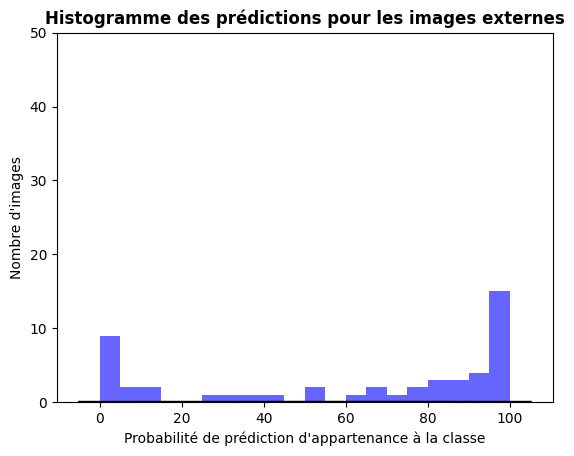

In [146]:
make_ext_pred_plot(prob_ext_903, 20)

In [119]:
print(prob_int_954)

[47.293826937675476, 99.69845414161682, 3.7016913294792175, 93.18878054618835, 39.39703404903412, 96.71743512153625, 44.441890716552734, 99.64137673377991, 99.19403195381165, 99.9829649925232, 18.60341727733612, 98.95463585853577, 86.45824790000916, 21.118687093257904, 21.064676344394684, 8.291672170162201, 1.850566826760769, 68.47710609436035, 0.6572327576577663, 97.78091311454773, 10.725073516368866, 99.95200634002686, 94.06730532646179, 99.71160888671875, 82.07043409347534, 99.7134804725647, 64.40371870994568, 97.24676609039307, 34.13238823413849, 14.484018087387085, 6.564022600650787, 99.71917271614075, 97.79687523841858, 99.78033900260925, 88.20726871490479, 99.99806880950928, 92.57816076278687, 100.0, 17.257313430309296, 99.24895763397217, 21.638543903827667, 18.60564351081848, 66.44997000694275, 65.77141880989075, 89.25246596336365, 1.7484091222286224, 99.90302324295044, 97.49133586883545, 7.8071363270282745, 65.82338213920593]


In [125]:
prob_int_954.index(min(prob_int_954))

18

In [126]:
prob_ext_954[35]

0.025660291430540383

In [127]:
min(prob_int_954)

0.6572327576577663